<a href="https://colab.research.google.com/github/AnandDaksh/Crop-Disease-Classification/blob/main/(VGG_16)cnn_cfar10_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [5]:
# Display shapes of training and test sets
X_train.shape
X_test.shape
y_train.shape

(50000, 1)

In [6]:
# Display first 5 labels in training set
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
# Reshape labels from 2D to 1D array
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
# Reshape test labels from 2D to 1D array
y_test = y_test.reshape(-1,)

In [9]:
# Define class names for CIFAR-10 dataset
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [10]:
# Function to plot a sample image from the dataset
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

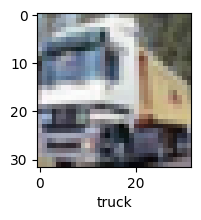

In [11]:
# Plot a sample image from the training set
plot_sample(X_train, y_train, 1)

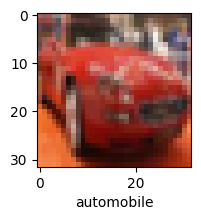

In [12]:
# Plot another sample image from the training set
plot_sample(X_train, y_train, 5)

In [13]:
# Normalize pixel values to range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

In [14]:
# Import necessary libraries
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16

In [15]:
# Load the VGG16 model without the top classification layer and with pretrained weights on imagenet
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [16]:
# Freeze the layers in the VGG16 model
for layer in vgg16.layers:
    layer.trainable = False

In [17]:
# Define custom classification layers
x = layers.Flatten()(vgg16.output)
x = layers.Dense(64, activation='relu')(x)
output = layers.Dense(10, activation='softmax')(x)

In [18]:
# Create the model
vgg16_model = models.Model(vgg16.input, output)

In [19]:
# Compile the model
vgg16_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

In [20]:
# Print model summary
vgg16_model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [22]:
# Fit the model (Note: epochs=0 is used for demonstration purpose, actual training will require specifying a number of epochs)
history = vgg16_model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


1416/1563 [==========================>...] - ETA: 50s - loss: 1.0593 - accuracy: 0.6293

KeyboardInterrupt: 

In [23]:
# Evaluate the model
vgg16_model.evaluate(X_test, y_test)

313/313 [==============================] - 103s 329ms/step - loss: 1.1741 - accuracy: 0.5896


[1.1740987300872803, 0.5896000266075134]

In [24]:
# Make predictions on the test data
y_pred = np.argmax(vgg16_model.predict(X_test), axis=-1)


313/313 [==============================] - 103s 330ms/step


In [25]:
# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

In [26]:
# Calculate accuracy
accuracy = np.trace(conf_matrix) / np.sum(conf_matrix)

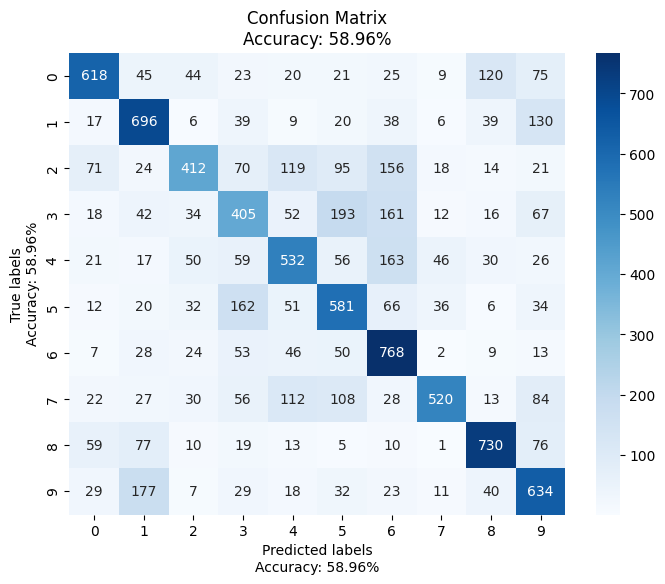

In [27]:
# Plot confusion matrix with accuracy percentage
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel(f'Predicted labels\nAccuracy: {accuracy*100:.2f}%')  # Multiply accuracy by 100
plt.ylabel(f'True labels\nAccuracy: {accuracy*100:.2f}%')       # Multiply accuracy by 100
plt.title(f'Confusion Matrix\nAccuracy: {accuracy*100:.2f}%')    # Multiply accuracy by 100
plt.show()


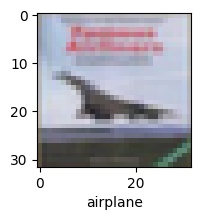

In [28]:
# Plot a sample image from the test set
plot_sample(X_test, y_test, 3)

In [29]:
# Get the predicted class name for the sample image
predicted_class_name = classes[y_pred[3]]
print(predicted_class_name)

automobile


In [ ]:
# Fit the model (Note: epochs=20 is used for demonstration purpose)
history = vgg16_model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Plotting accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

# Plotting loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Epoch 1/20
 682/1563 [============>.................] - ETA: 4:55 - loss: 1.0381 - accuracy: 0.6360